# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.



# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.



# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long­term rider retention (again, a few sentences will suffice).



## Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 daysafter
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

# Part 1 - Answers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
df.set_index('login_time', inplace=True)
df['count'] = 1
df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [5]:
df = df.resample('15T').sum()
df.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


In [7]:
df = df.reset_index()
df.columns = ['time', 'logins']
df.head()

,time,logins
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [8]:
df['day_of_month'] = df.time.dt.day
df['month'] = df.time.dt.month
df['weekday'] = df.time.dt.weekday
df['hour'] = df.time.dt.hour
df.head()

,time,logins,day_of_month,month,weekday,hour
0,1970-01-01 20:00:00,2,1,1,3,20
1,1970-01-01 20:15:00,6,1,1,3,20
2,1970-01-01 20:30:00,9,1,1,3,20
3,1970-01-01 20:45:00,7,1,1,3,20
4,1970-01-01 21:00:00,1,1,1,3,21


In [9]:
logins_by_month = df.groupby('month').sum()['logins']
logins_by_hour = df.groupby('hour').sum()['logins']
logins_by_day_of_month = df[df['month'] < 4].groupby('day_of_month').sum()['logins']
logins_by_weekday = df.groupby('weekday').sum()['logins']

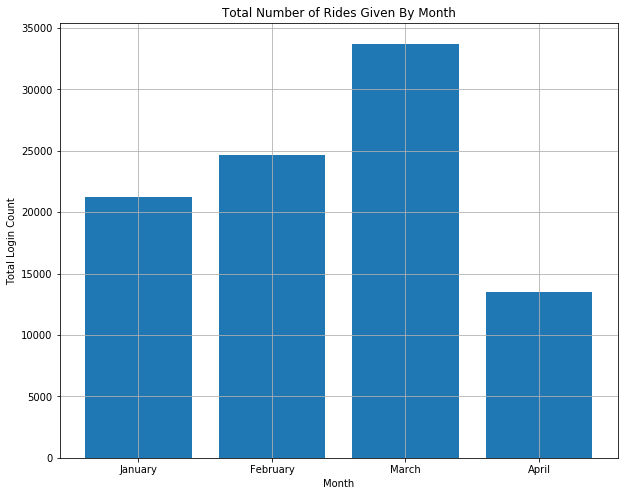

In [10]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_month.index, logins_by_month.values)
plt.ylabel('Total Login Count')
plt.xlabel('Month')
plt.title('Total Number of Rides Given By Month')
plt.xticks(np.arange(1, 5), ('January', 'February', 'March', 'April'))
plt.grid()

The figure above shows us that the trend in number of riders seems to be increasing in the months from January to March. However, there is not enough data to know if this trend will hold. The reason the bar representing April is so low is due to the fact that the rider data only continues until April 13th, and does not represent the whole month. However, if ridership stays the same during the month of April, it appears as through it will not exceed March levels given the fact that ridership is considerably less that half of what was in March.

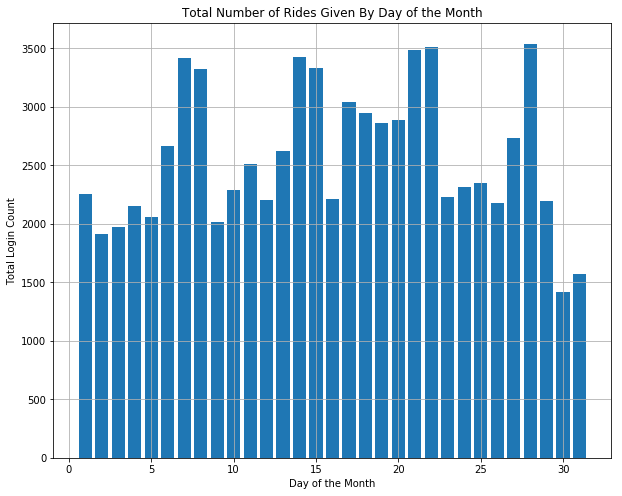

In [11]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_day_of_month.index, logins_by_day_of_month.values)
plt.ylabel('Total Login Count')
plt.xlabel('Day of the Month')
plt.title('Total Number of Rides Given By Day of the Month')
plt.grid()

The figure above provides some interesting results. First it should be reiterated that that figure was created by only using data from January, February, and March. April data was excluded since it does not extend through the entire month and would cause the figure to falsely minimize the height of the bars for days in the later part of the month. However, despite this, we still notice a dip in the total login count for the 30th and 31st days of the month. The reason for this is simply due to the fact that February only contains 28 days, while January and March both contain 31. Perhaps more interesting are the peaks that can be observed on the 7th and 8th, the 14th and 15th, the 21st and 22nd, and the 27th and 28th. As you might notice from simply seeing them written out, each of these pairs of dates is about a week apart, and corresponds to the weekends in each month. As it turns out corresponds to the weekends of February and March. Since February only has 28 days (which is exactly four weeks), the following month of March does not experience the 2 or 3 day shift that causes the weekdays to land on different dates, as is the case will all other months. As might be expected, this figure is hinting at us that taxi cab ridership is more common on the weekends. However, more analysis can be done to make sure this is indeed the case. 

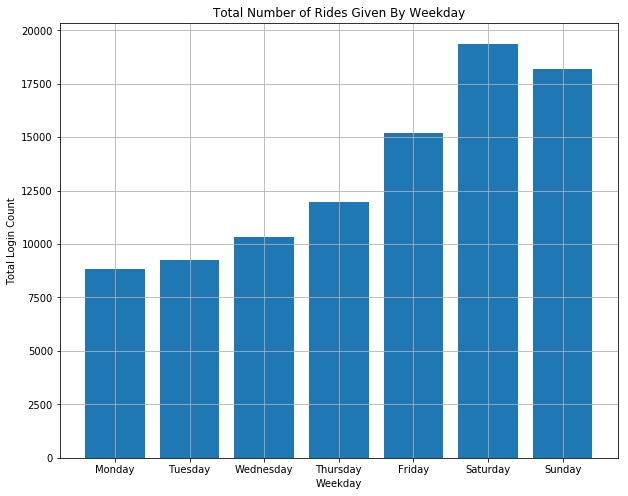

In [12]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_weekday.index, logins_by_weekday.values)
plt.ylabel('Total Login Count')
plt.xlabel('Weekday')
plt.title('Total Number of Rides Given By Weekday')
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.grid()

The figure above confirms the suspicious of the previous one: taxi cab ridership is more prevalent on the weekends.

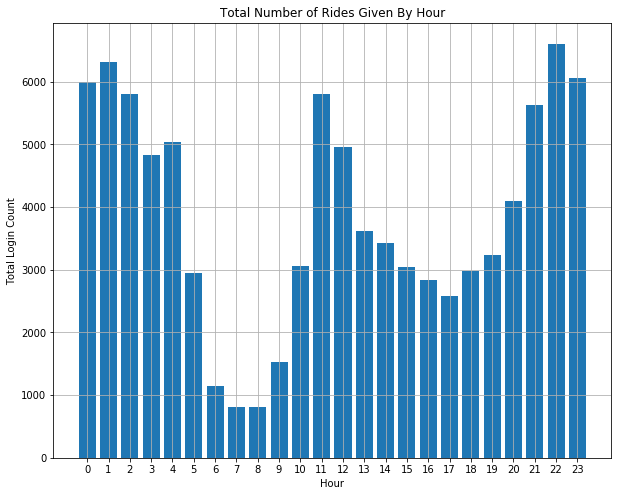

In [13]:
plt.figure(figsize=(10,8))
plt.bar(logins_by_hour.index, logins_by_hour.values)
plt.ylabel('Total Login Count')
plt.xlabel('Hour')
plt.title('Total Number of Rides Given By Hour')
plt.xticks(np.arange(0,24))
plt.grid()

According to the figure above, it is clear that the hour of the day also plays a considerable role in taxi cab ridership. From the figure above, ridership is most common at night between 10pm and 2am. There is another spike in ridership around lunchtime (between 11 and 12), and the least common time is perhaps surprisingly in the morning between 6am and 8am. 

In [14]:
# Between Jan 1st, 1970 and April 13th, 1970 there are:
# - 15 Thursdays 
# - 15 Fridays
# - 15 Saturdays
# - 15 Sundays
# - 15 Mondays
# - 14 Tuesdays
# - 14 Wednesdays
num_weekdays = [15, 14, 14, 15, 15, 15, 15]
avg_logins_by_weekday = logins_by_weekday / num_weekdays
# Between Jan 1st, 1970 and April 13th, 1970there are: 103 days
num_days = 103
avg_logins_by_hour = logins_by_hour / num_days

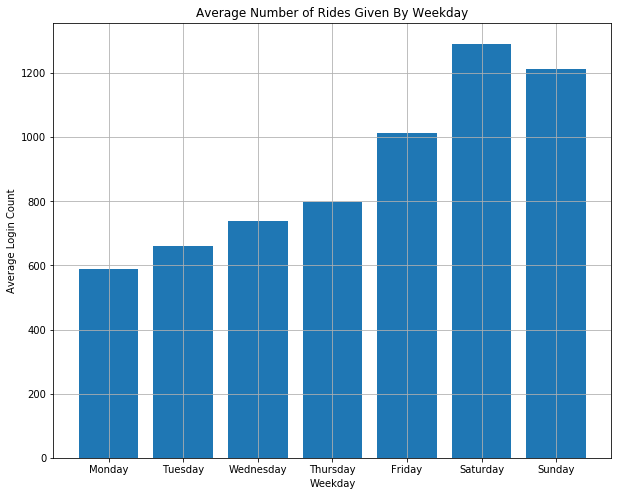

In [15]:
plt.figure(figsize=(10,8))
plt.bar(avg_logins_by_weekday.index, avg_logins_by_weekday.values)
plt.ylabel('Average Login Count')
plt.xlabel('Weekday')
plt.title('Average Number of Rides Given By Weekday')
plt.xticks(np.arange(0,7), ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'))
plt.grid()

The figure above shows how many rides the company will give on average for over the course of each weekday.

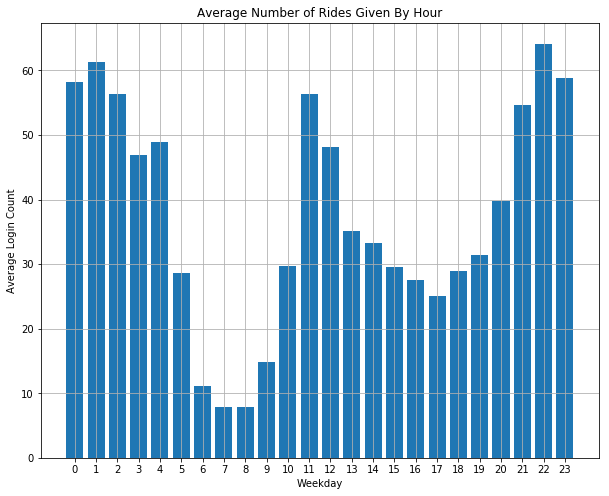

In [16]:
plt.figure(figsize=(10,8))
plt.bar(avg_logins_by_hour.index, avg_logins_by_hour.values)
plt.ylabel('Average Login Count')
plt.xlabel('Weekday')
plt.title('Average Number of Rides Given By Hour')
plt.xticks(np.arange(0,24))
plt.grid()

The figure above shows the average number of rides the company will perform for each hour of the day. 

In [17]:
logins_by_weekday_hour = df.groupby(['weekday', 'hour']).sum()['logins']
logins_by_weekday_hour = logins_by_weekday_hour.reset_index()

In [18]:
best_hours = []
for i in range(7):
    tmp = logins_by_weekday_hour[logins_by_weekday_hour['weekday'] == i]
    tmp = tmp.nlargest(4, columns=['logins'])
    best_hours.append([i, tmp['hour'].values])

In [19]:
best_hours_df = pd.DataFrame(best_hours)
best_hours_df.columns = ['weekday', 'best_hours']
best_hours_df

,weekday,best_hours
0,0,"[11, 12, 22, 21]"
1,1,"[11, 22, 23, 12]"
2,2,"[11, 23, 22, 21]"
3,3,"[11, 22, 23, 21]"
4,4,"[22, 23, 21, 11]"
5,5,"[4, 2, 3, 1]"
6,6,"[4, 3, 2, 1]"


In [20]:
def convert_to_name(weekday_num):
    if weekday_num == 0:
        return 'Monday'
    elif weekday_num == 1:
        return 'Tuesday'
    elif weekday_num == 2:
        return 'Wednesday'
    elif weekday_num == 3:
        return 'Thursday'
    elif weekday_num == 4:
        return 'Friday'
    elif weekday_num == 5:
        return 'Saturday'
    else:
        return 'Sunday'

best_hours_df['weekday'] = best_hours_df['weekday'].map(convert_to_name)
best_hours_df.set_index('weekday')

,best_hours
weekday,
Monday,"[11, 12, 22, 21]"
Tuesday,"[11, 22, 23, 12]"
Wednesday,"[11, 23, 22, 21]"
Thursday,"[11, 22, 23, 21]"
Friday,"[22, 23, 21, 11]"
Saturday,"[4, 2, 3, 1]"
Sunday,"[4, 3, 2, 1]"


The chart above shows the hours that result in the highest rates of ridership for each day of the week. Notice that on Satuday and Sunday, ridership is highest during the early morning hours (1-4am), presumably after people have had a long night out. On weekdays, the hours with highest ridership are around lunchtime, 11am-12pm, and nighttime, 10pm-11pm. 

## Final Thoughts
Day of the week, and hour of the day appear to be the most important factors in determining ridership. More specifically, ridership increases during late night hours (10pm-2am) and lunchtime hours (11am-12pm).

# Part 2  - Answers

# Part 3 - Answers

## Data Importing and Cleaning

In [21]:
import json

with open('ultimate_data_challenge.json') as f:
    data = json.load(f)

df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [23]:
df[df['avg_rating_by_driver'].isnull()].head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
90,6.28,NaN,5.0,1.00,Winterfell,2014-02-09,iPhone,2014-01-10,0.0,1,False,0.0
274,6.00,NaN,2.0,4.00,Astapor,2014-02-09,iPhone,2014-01-25,100.0,1,False,0.0
277,1.82,NaN,NaN,1.00,Winterfell,2014-01-26,iPhone,2014-01-25,0.0,1,False,0.0
536,1.41,NaN,5.0,1.00,Winterfell,2014-02-08,Android,2014-01-18,0.0,1,False,100.0
857,0.42,NaN,4.0,1.00,Winterfell,2014-03-16,iPhone,2014-01-11,0.0,0,False,0.0
1021,2.33,NaN,NaN,1.75,King's Landing,2014-06-13,iPhone,2014-01-23,100.0,0,True,100.0
1073,9.21,NaN,5.0,1.00,King's Landing,2014-04-27,Android,2014-01-19,0.0,0,False,0.0
1164,2.57,NaN,2.0,1.00,Winterfell,2014-01-25,Android,2014-01-24,0.0,1,True,100.0
1181,24.91,NaN,3.0,1.00,Winterfell,2014-01-25,Android,2014-01-25,0.0,1,False,0.0
1205,8.94,NaN,NaN,1.00,Winterfell,2014-02-22,Android,2014-01-18,0.0,0,False,100.0


In [24]:
df[df['avg_rating_of_driver'].isnull()].head(10)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
6,3.95,4.0,NaN,1.0,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0
9,2.37,5.0,NaN,1.0,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
12,20.29,5.0,NaN,1.0,Winterfell,2014-03-12,iPhone,2014-01-15,0.0,1,False,100.0
14,26.01,5.0,NaN,1.0,Astapor,2014-01-28,Android,2014-01-27,0.0,1,False,100.0
15,13.20,5.0,NaN,1.0,Winterfell,2014-01-16,Android,2014-01-15,0.0,1,True,100.0
20,2.53,3.0,NaN,1.0,Winterfell,2014-03-16,Android,2014-01-31,0.0,1,False,50.0
21,3.31,5.0,NaN,1.0,Astapor,2014-04-29,iPhone,2014-01-09,0.0,1,False,100.0
22,11.47,5.0,NaN,1.0,Winterfell,2014-05-02,iPhone,2014-01-24,0.0,0,False,100.0
25,14.48,5.0,NaN,1.0,Winterfell,2014-01-03,iPhone,2014-01-02,0.0,1,True,100.0
28,5.97,5.0,NaN,1.5,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0


In [25]:
# From the above two printouts shown above, NaN values come from users with low ridership.
# Replace NaN values for these two columns using their respective means.
df['avg_rating_by_driver'].fillna(df.avg_rating_by_driver.mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df.avg_rating_of_driver.mean(), inplace=True)

In [26]:
df['phone'].value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [27]:
def input_phone_type(phone_type):
    if phone_type == None:
        max_num = 34582 + 15022
        rand_int = np.random.randint(low=1, high=max_num, size=4)[0]
        if rand_int <= 15022:
            return 'Android'
        else:
            return 'iPhone'
    else:
        return phone_type

df['phone'] = df['phone'].map(input_phone_type)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     50000 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [29]:
# alternate cleaning method where all rows with any null values are removed.
df = pd.DataFrame(data)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
city                      41445 non-null object
last_trip_date            41445 non-null object
phone                     41445 non-null object
signup_date               41445 non-null object
surge_pct                 41445 non-null float64
trips_in_first_30_days    41445 non-null int64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [30]:
# If a user took a ride in the period 30 days before our last date, consider them retained. 
# Note that since the last date is 2014-07-01, and the first date is 2014-01-01, this is a 
# six-month retention period. 
print(df['signup_date'].min())
print(df['last_trip_date'].max())

2014-01-01
2014-07-01


In [31]:
def make_targets(last_trip_date):
    if last_trip_date < '2014-06-01':
        return 0 # not retained
    else:
        return 1 # retained

df['retained'] = df['last_trip_date'].apply(make_targets)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0


In [32]:
retention_rate = np.sum(df['retained'] == 1) / len(df['retained']) * 100
print('The percetage of riders that were retained over a six-month period is: %3.2f%%' % retention_rate)

The percetage of riders that were retained over a six-month period is: 41.10%


In [33]:
df = pd.get_dummies(df, columns=['city', 'phone', 'ultimate_black_user'], drop_first=True)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,signup_date,surge_pct,trips_in_first_30_days,weekday_pct,retained,city_King's Landing,city_Winterfell,phone_iPhone,ultimate_black_user_True
0,3.67,5.0,4.7,1.10,2014-06-17,2014-01-25,15.4,4,46.2,1,1,0,1,1
1,8.26,5.0,5.0,1.00,2014-05-05,2014-01-29,0.0,0,50.0,0,0,0,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,2014-01-06,0.0,3,100.0,0,0,0,1,0
3,2.36,4.9,4.6,1.14,2014-06-29,2014-01-10,20.0,9,80.0,1,1,0,1,1
4,3.13,4.9,4.4,1.19,2014-03-15,2014-01-27,11.8,14,82.4,0,0,1,0,0


## Exploratory Data Analysis

## Predictive Modeling

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['last_trip_date', 'signup_date', 'retained']).values
y = df.retained.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test) 
print('Random Forest Classifier Test Set Performance: %3.2f' %score)

/anaconda3/envs/datatools/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Classifier Test Set Performance: 0.74


Out of the box, the random forest classifier produces reliable performance, giving approximately 74% accuracy. 

In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15],
    'n_estimators': np.arange(50, 100, 200),
    'min_samples_leaf': np.arange(2, 6),
    'min_samples_split': np.arange(2, 12)
}

rfc = RandomForestClassifier()
gscv = GridSearchCV(rfc, param_grid=param_grid, cv=3)
gscv.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 10, 15], 'n_estimators': array([50]), 'min_samples_leaf': array([2, 3, 4, 5]), 'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
gscv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 8,
 'n_estimators': 50}

In [38]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=8, n_estimators=50)
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test) 
print('Random Forest Classifier Test Set Performance: %3.2f' %score)

Random Forest Classifier Test Set Performance: 0.77


After some hyperparameter tuning the performance of the random forest classifier increased to approximately 78%; this is quite good!

In [39]:
feature_importances = pd.DataFrame(rfc.feature_importances_, \
                                   index = df.drop(columns=['last_trip_date', 'signup_date', 'retained']).columns, \
                                   columns=['importance']).sort_values('importance', ascending=False)

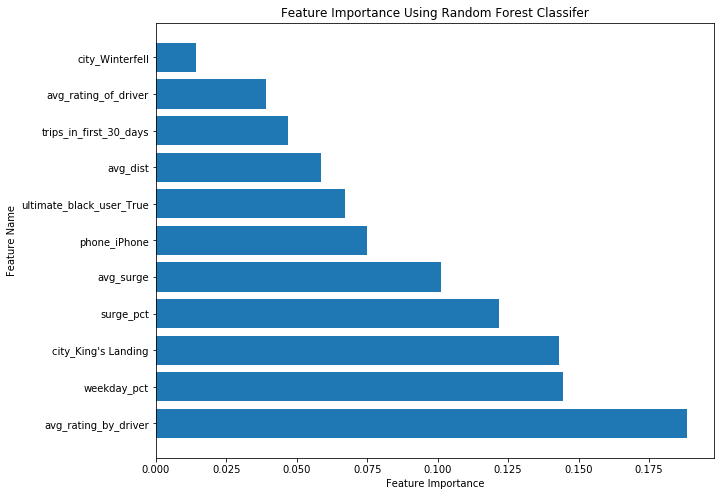

In [40]:
plt.figure(figsize=(10,8))
plt.barh(feature_importances.index, feature_importances.importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance Using Random Forest Classifer');

In [41]:
retained_df = df[df['retained'] == 1]
not_retained_df = df[df['retained'] == 0]
print(retained_df.shape)
print(not_retained_df.shape)

(17035, 14)
(24410, 14)


4.759630173172878
4.788181073330602


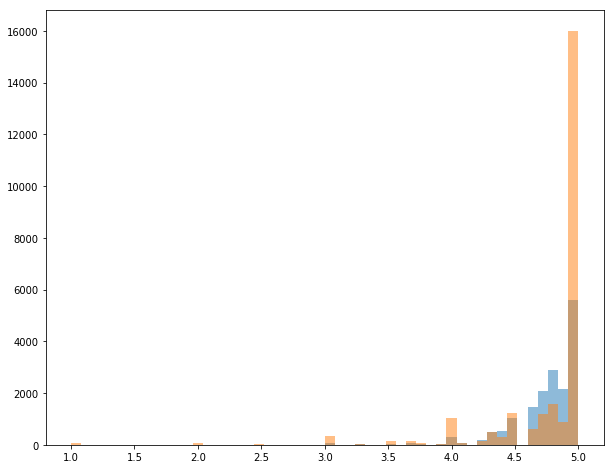

In [42]:
plt.figure(figsize=(10,8))

plt.hist(retained_df['avg_rating_by_driver'], bins = 50, alpha = 0.5)
plt.hist(not_retained_df['avg_rating_by_driver'], bins = 50, alpha = 0.5)

print(retained_df['avg_rating_by_driver'].mean())
print(not_retained_df['avg_rating_by_driver'].mean())

In [43]:
print(retained_df['surge_pct'].mean())
print(not_retained_df['surge_pct'].mean())

9.142723803933078
8.728418680868495


In [44]:
print(retained_df['city_King\'s Landing'].mean())
print(not_retained_df['city_King\'s Landing'].mean())

0.33671852069269154
0.12449815649324047
